NAMA: Fathan Naufal R<br>
NIM: 211351054 <br>
Kelas: Informatika Pagi B

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fathannr","key":"251785e6198dd3e76baec0bac05dba0f"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d knightbearr/pizza-price-prediction

  0% 0.00/2.58k [00:00<?, ?B/s]
100% 2.58k/2.58k [00:00<00:00, 4.92MB/s]


In [7]:
# UNZIP

!mkdir pizza-price-prediction
!unzip pizza-price-prediction.zip -d pizza-price-prediction
!ls pizza-price-prediction

Archive:  pizza-price-prediction.zip
  inflating: pizza-price-prediction/pizza_v1.csv  
  inflating: pizza-price-prediction/pizza_v2.csv  
pizza_v1.csv  pizza_v2.csv


In [8]:
df = pd.read_csv('/content/pizza-price-prediction/pizza_v1.csv')

In [9]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [16]:
df.isna().sum()

company         0
price_rupiah    0
diameter        0
topping         0
variant         0
size            0
extra_sauce     0
extra_cheese    0
dtype: int64

In [17]:
df=df.dropna()

In [19]:
df['company'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [18]:
df['price_rupiah'].unique()

array(['Rp235,000', 'Rp198,000', 'Rp120,000', 'Rp155,000', 'Rp248,000',
       'Rp140,000', 'Rp110,000', 'Rp70,000', 'Rp90,000', 'Rp230,000',
       'Rp188,000', 'Rp114,000', 'Rp149,000', 'Rp23,500', 'Rp46,000',
       'Rp72,000', 'Rp49,000', 'Rp83,000', 'Rp96,000', 'Rp31,000',
       'Rp69,000', 'Rp93,000', 'Rp75,000', 'Rp115,000', 'Rp123,000',
       'Rp33,000', 'Rp76,000', 'Rp119,000', 'Rp126,500', 'Rp39,000',
       'Rp99,000', 'Rp44,000', 'Rp78,000', 'Rp105,000', 'Rp35,000',
       'Rp60,000', 'Rp98,000', 'Rp28,000', 'Rp51,000', 'Rp84,000',
       'Rp32,000', 'Rp54,000', 'Rp92,000'], dtype=object)

In [20]:
df['topping'].unique()

array(['chicken', 'papperoni', 'mushrooms', 'smoked beef', 'mozzarella',
       'black papper', 'tuna', 'meat', 'sausage', 'onion', 'vegetables',
       'beef'], dtype=object)

In [21]:
df['variant'].unique()

array(['double_signature', 'american_favorite', 'super_supreme',
       'meat_lovers', 'double_mix', 'classic', 'crunchy', 'new_york',
       'double_decker', 'spicy_tuna', 'BBQ_meat_fiesta', 'BBQ_sausage',
       'extravaganza', 'meat_eater', 'gournet_greek', 'italian_veggie',
       'thai_veggie', 'american_classic', 'neptune_tuna', 'spicy tuna'],
      dtype=object)

In [25]:
df['size'].unique()

array(['jumbo', 'reguler', 'small', 'medium', 'large', 'XL'], dtype=object)

In [26]:
df['extra_sauce'].unique()

array(['yes', 'no'], dtype=object)

In [27]:
df['extra_cheese'].unique()

array(['yes', 'no'], dtype=object)

In [34]:
df['company'].replace(['A', 'B', 'C', 'D', 'E'],[0,1,2,3,4], inplace=True)
df['price_rupiah'].replace(['Rp235,000', 'Rp198,000', 'Rp120,000', 'Rp155,000', 'Rp248,000','Rp140,000', 'Rp110,000', 'Rp70,000', 'Rp90,000', 'Rp230,000','Rp188,000', 'Rp114,000', 'Rp149,000', 'Rp23,500', 'Rp46,000','Rp72,000', 'Rp49,000', 'Rp83,000', 'Rp96,000', 'Rp31,000','Rp69,000', 'Rp93,000', 'Rp75,000', 'Rp115,000', 'Rp123,000','Rp33,000', 'Rp76,000', 'Rp119,000', 'Rp126,500', 'Rp39,000','Rp99,000', 'Rp44,000', 'Rp78,000', 'Rp105,000', 'Rp35,000','Rp60,000', 'Rp98,000', 'Rp28,000', 'Rp51,000', 'Rp84,000','Rp32,000', 'Rp54,000', 'Rp92,000'],[235.000, 198.000, 120.000, 155.000, 248.000, 140.000, 110.000, 70.000, 90.000, 230.000, 188.000, 114.000, 149.000, 23.500, 46.000,72.000,49.000, 83.000, 96.000,31.000, 69.000, 93.000, 75.000, 115.000, 123.000, 33.000, 76.000, 119.000, 126.500, 39.000, 99.000,44.000, 78.000, 105.000, 35.000, 60.000, 98.000, 28.000, 51.000, 84.000, 32.000, 54.000, 92.000], inplace=True)
df['topping'].replace(['chicken', 'papperoni', 'mushrooms', 'smoked beef', 'mozzarella','black papper', 'tuna', 'meat', 'sausage', 'onion', 'vegetables','beef'],[0,1,2,3,4,5,6,7,8,9,10,11], inplace=True)
df['variant'].replace(['double_signature', 'american_favorite', 'super_supreme','meat_lovers', 'double_mix', 'classic', 'crunchy', 'new_york','double_decker', 'spicy_tuna', 'BBQ_meat_fiesta', 'BBQ_sausage','extravaganza', 'meat_eater', 'gournet_greek', 'italian_veggie','thai_veggie', 'american_classic', 'neptune_tuna', 'spicy tuna'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], inplace=True)
df['size'].replace(['jumbo', 'reguler', 'small', 'medium', 'large', 'XL'],[1,2,3,4,5,6], inplace=True)
df['extra_sauce'].replace(['yes', 'no'],[0,1], inplace=True)
df['extra_cheese'].replace(['yes', 'no'],[0,1] , inplace=True)

<Axes: >

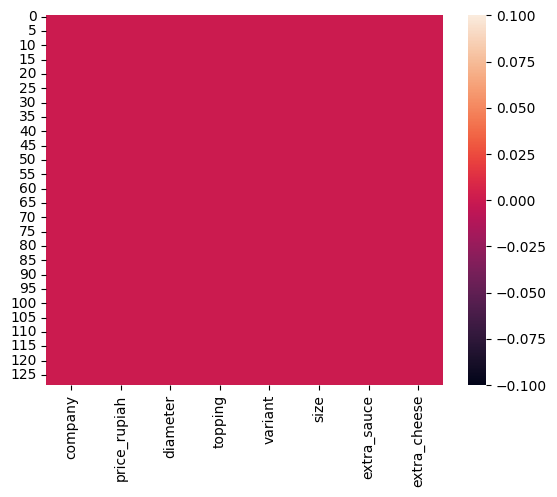

In [35]:
sns.heatmap(df.isnull())

In [12]:
df.describe()

,diameter
count,129.000000
mean,12.976744
std,3.272674
min,8.000000
25%,12.000000
50%,12.000000
75%,14.000000
max,22.000000


<Axes: >

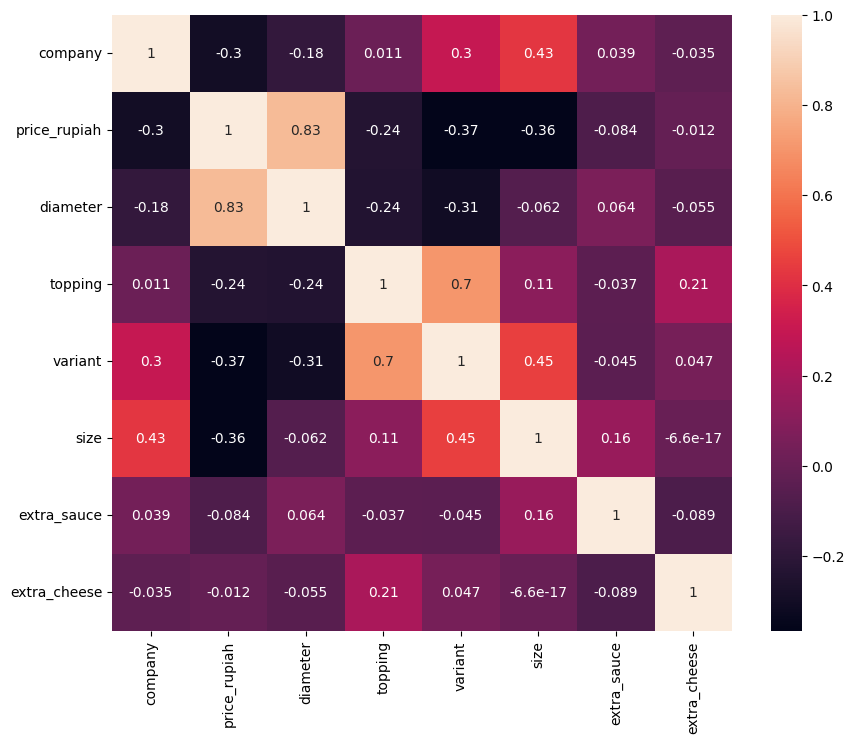

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [49]:
df.head(10)

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,0,235.0,22.0,0,0,1,0,0
1,0,198.0,20.0,1,0,1,0,0
2,0,120.0,16.0,2,0,2,0,0
3,0,155.0,14.0,3,0,2,0,1
4,0,248.0,18.0,4,0,1,0,1
5,0,140.0,18.5,5,1,1,1,1
6,0,110.0,16.0,3,1,1,1,0
7,0,70.0,8.0,1,1,2,1,1
8,0,90.0,12.0,2,1,2,0,1
9,0,90.0,12.0,3,1,2,1,1


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()

In [41]:
X = df.drop(['price_rupiah'], axis=1)

In [44]:
y = df['price_rupiah']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
score = lr.score(X_test,y_test)
print('Akurasi model regresi linier = ') ,score

Akurasi model regresi linier = 


(None, 0.786947701273773)

In [51]:
input_data = np.array([[0,18.5,5,1,1,1,1]])
prediction = lr.predict(input_data)
print('Prediksi Harga Laptop: ', prediction)

Prediksi Harga Laptop:  [163.04194142]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [52]:
from sklearn.metrics import r2_score
r2_DT = r2_score(y_test, pred)
r2_DT

print(f"Precision = {r2_DT}")

Precision = 0.786947701273773


In [53]:
import pickle
filename = 'pizza-price-prediction.sav'
pickle.dump(lr,open(filename,'wb'))